# Drawing from Probability Distributions
A key part of any Monte Carlo simulation is drawing random numbers from known distributions. We model certain physical systems according to various statistical behaviors characterized by probability distributions. 

# Drawing from non-uniform random distributions

In the previous section we learned how to generate random numbers from
a uniform probability distribution in an interval $[a,b]$. This
distribution was normalized, so that $$\int _a^b {P(x)dx}=1.$$ Hence, the uniform distribution *by definition* is
$P(x)=1/(b-a)$.

Now, suppose that we generate a sequence $\{x_i\}$ and we take some
function of it to generate $\{y(x_i)\}=\{y_i\}$. This new sequence is
going to be distributed according to some probability density $P(y)$,
such that $$P(y)dy=P(x)dx$$ or $$P(y)=P(x)\frac{dx}{dy}.$$

If we want to generate a desired normalized distribution $P(y)$ from a uniform distribution $P(x)$, we need
to solve the differential equation: $$\frac{dx}{dy}=P(y).$$ But the
solution of this is $$x=\int _0^y {P(y')dy'}=F(y).$$ Therefore,
$$y(x)=F^{-1}(x),\label{invert}$$ 
where $F^{-1}$ is the inverse of $F$.

### Example: Exponential distribution

As an example, let us take $y(x)=-\ln{(x)}$ with $P(x)$ representing a
uniform distribution in the interval $[0,1]$. Then
$$P(y)=\frac{dx}{dy}=e^{-y},$$ which is distributed exponentially. This
distribution occurs frequently in real problems such as the radioactive
decay of nuclei. You can also see that the quantity $y/\lambda$ has the
distribution $\lambda
e^{-\lambda y}$.




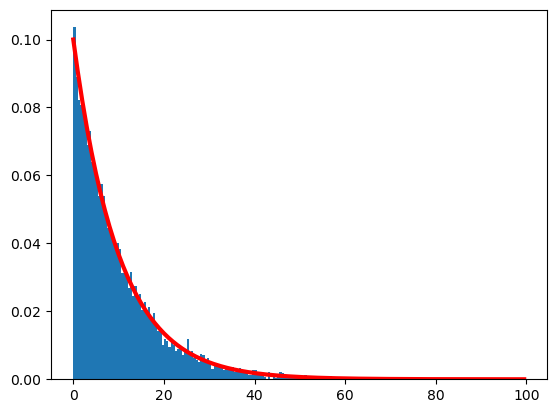

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 10000
# draw from a uniform distribution
r = np.random.random(N) 

xlambda = 0.1 
x = -np.log(r)/xlambda

binwidth=xlambda*5

pyplot.hist(x,bins=np.arange(0.,100., binwidth),density=True);
pyplot.plot(np.arange(0.,100.,binwidth),xlambda*np.exp(-xlambda*np.arange(0.,100.,binwidth)),ls='-',c='red',lw=3);

# Drawing random numbers from distributions
You can draw random numbers from known distributions by using a subpackage of `scipy` called [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) or using the `random` package. `scipy.stats` contains functions relating to statistical tests and statistical distributions, both continuous and discrete. Keep this package in mind!

Here is small program that models the decay of Thallium to Lead.

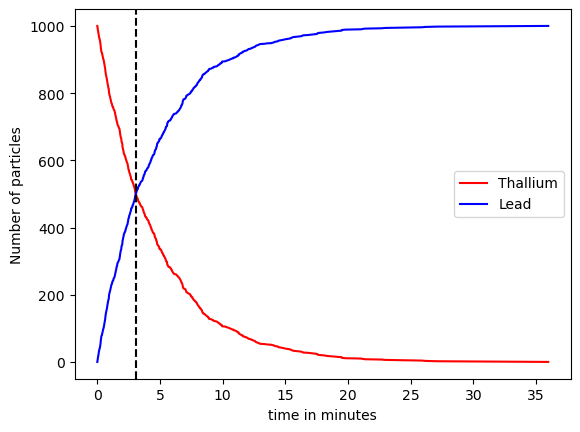

In [4]:
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as mp
#Script models the decay of 1000 Thallium atoms to lead by drawing from a nonuniform probability distribution
NT = 1000;
NPb = 0
#lifetime of Thallium in minutes
lifetime = 3.053/np.log(2) 

# draw exp distribution to produce a Monte Carlo Simulation
from scipy.stats import expon
#draw from exponential distribution
data_expon = expon.rvs(scale=lifetime,loc=0,size=1000)
#decays happen at random points according to exponential distribution
timepoints = np.sort(data_expon)
Tpoints = np.linspace(NT,0,NT)
Pbpoints = np.linspace(0,NT,NT)
mp.plot(timepoints,Tpoints,'r',label="Thallium")
mp.plot(timepoints,Pbpoints,'b',label="Lead")
mp.axvline(x=lifetime*np.log(2), color='k', linestyle='--')
mp.xlabel("time in minutes")
mp.ylabel("Number of particles")
mp.legend()

# Particle Physics
Many of the particles produced at accelerations like the Large Hadron Collider (LHC), Fermilab, and the Relativistic Heavy Ion Collider (RHIC) are classified as "resonances". In practical terms resonances are just unstable particles, that is particles that decay. These resonances are subject to the energy-time uncertainty principle $$\Delta E \Delta t \sim \hbar$$ that is, the mass of resonances take a range of possible values depending on their lifetime. The mass values of resonances are modeled using a Breit-Wigner distribution:
$$f(E) = \frac{k}{(E^2-M^2)^2 - \Gamma^2 M^2}$$
where
$$k = \frac{2\sqrt{2}M\Gamma\gamma}{\pi(M^2-\gamma)},\quad \gamma = \sqrt{M^2(M^2-\Gamma^2)}$$
where *E* is the center of mass energy of the collision, *M* the central mass of the resonance, and $\Gamma$ is the decay width where the lifetime, $\tau$ is $$\tau = \frac{1}{\Gamma}.$$

The package `scipy.stats` contains functions that allow us to draw from Breit-Wigner distributions. This allows us to produce monte carlo simulations of particle interactions, compare the simulations to data, and determine whether physical theories are failing to describe some phenomena. 

In [6]:
#magic command to force display of graphics 
%matplotlib inline
import numpy as np
from scipy.stats import rel_breitwigner
import matplotlib.pyplot as mp

In [8]:
#For the Z0 boson
M = 91.1876 #GeV
gamma = 2.4952 #GeV
#the rel_breitwigner distribution takes two parameters
rZ = rel_breitwigner.rvs(M/gamma,scale = gamma, size=1000)
print(rZ)

[ 90.48929381  88.54729194  89.68788603 100.10273985  89.55972951
  88.87895177  92.19124165  89.54644226  92.40431664  94.06867876
  89.57583626  90.92636241  89.0255821   91.48530545  91.54566178
  83.18245574  88.82678607  91.0353439   91.60904156  90.77176322
  93.05327626  87.70828315  88.06623405  63.75598864  90.6694287
  89.07949099  93.44351457  78.74718931  90.25470236  44.79959319
  91.4858153   88.36003398  90.98436673  89.97042559  92.01066217
  91.81239431  92.90186325  92.05145504  86.76425915 104.2098949
 111.15437702  90.30822212  93.43894603  89.39041205  94.96277662
  91.85332439  88.42114455  90.65853615  95.34664196  91.36681372
  96.83829124  90.83706275  92.73190507  88.38656742  92.25465129
  90.86942023  91.08926549 105.57951789  90.56099767  91.6921404
  92.19874579  76.7817464   90.54664925  91.34221671  92.66019222
  83.26226249 105.21672458  90.6012198   91.17064001  92.70732191
  87.99824737  89.1274654   92.84568832  91.70507818 234.45915992
  92.18800071

Text(0.5, 0, 'Center of Mass Energy $E_{cm}$ (GeV)')

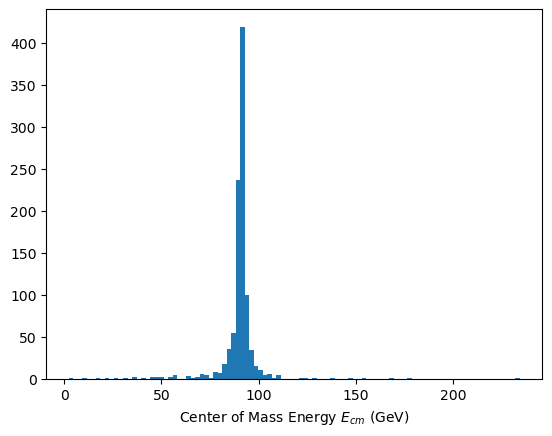

In [10]:
mp.hist(rZ,bins=100)
mp.xlabel('Center of Mass Energy $E_{cm}$ (GeV)')

In [12]:
# For the Higgs boson
mass = 125.3 #GeV
width = 0.004 #GeV
rho =mass/width
sc = width
rH = rel_breitwigner.rvs(rho,scale =sc, size=1000)
print(rH)

[125.3029012  125.30102514 125.29213469 125.29826934 125.303721
 125.30219786 125.30034671 125.30035999 125.29926534 125.29884755
 125.29127955 125.29938201 125.30070141 125.30065327 125.29939202
 125.29538224 125.30386442 125.29114777 125.29292446 125.28597783
 125.30248685 125.29868347 125.31138053 125.30165472 125.32112021
 125.30307069 125.29676592 125.30795296 125.33725763 125.30629362
 125.29846252 125.25909489 125.30029338 125.29045001 125.298167
 125.29982327 125.29409521 125.29963957 125.31430671 125.30025071
 125.30140469 125.30078116 125.30105204 124.88835168 125.32363113
 125.2980326  125.30235039 125.30405276 125.29977666 125.30300151
 125.29932781 125.29889596 125.28402961 125.29910305 125.29154452
 125.2977888  125.2969474  125.2994918  125.30026069 125.29823417
 125.29607266 125.30369642 125.30116439 125.29622273 125.29693394
 125.32552526 125.30210029 125.30012497 125.29855348 125.29914451
 125.30159772 125.30262958 125.30514996 125.30212432 125.30170496
 125.29956096 

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   1.,   2.,   0.,   2.,   4.,  19., 672., 253.,  18.,
          6.,   6.,   3.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([124.52211677, 124.53682633, 124.5515359 , 124.56624546,
        124.58095503, 124.59566459, 124.61037416, 124.62508372,
        124.63979329, 124.65450285, 124.66921242, 124.68392198,
        124.69863155, 124.71334111, 124.72805068, 124.74276024,
        124.75746981, 124.77217937, 124.78688894, 124.8015985 

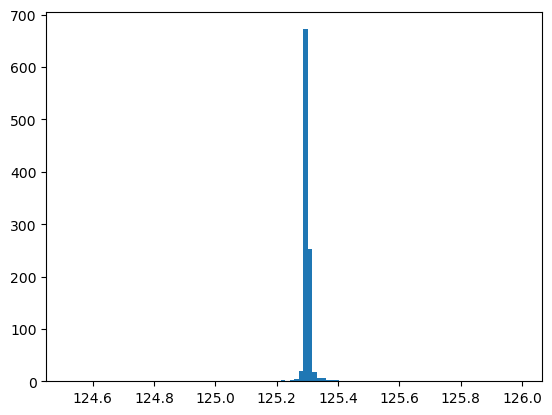

In [14]:
mp.hist(rH,bins=100)

In [16]:
#combine random lists
rT = np.concatenate((rZ,rH),axis=None)
print(rT)

[ 90.48929381  88.54729194  89.68788603 ... 125.29989921 125.29885042
 125.30186326]


(array([  1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   2.,   2.,   0.,
          2.,   4.,   0.,   0.,   3.,   1.,   2.,   6.,   4.,   1.,   8.,
          7.,  17.,  35.,  55., 237., 419., 100.,  34.,  15.,  10.,   5.,
          6.,   1.,   4.,   0.,   0.,   0.,   0.,   1., 996.,   5.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  2.42237468,   4.74274254,   7.06311039,   9.38347824,
         11.70384609,  14.02421395,  16.3445818 ,  18.66494965,
         20.9853175 ,  23.30568536,  25.62605321,  27.94642106,
         30.26678891,  32.58715676,  34.90752462,  37.22789247,
         39.54826032,  41.86862817,  44.18899603,  46.50936388

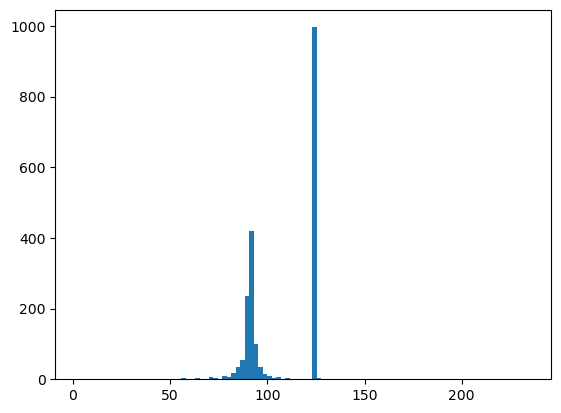

In [18]:
#what the reconstruction from accelerator detectors would look like in an ideal world
mp.hist(rT, bins=100)

## The key difference between `random` and `numpy.random` and `scipy.stats`
You can draw from the same distributions whether using the `random`, `numpy.random`, or the `scipy.stats` package. The difference comes down to convenience. 'random' package functions tend to only draw 1 number at a time. 

In [20]:
import random as rn
rn.expovariate(lambd = 2)

1.295838150185208

(array([71., 66., 61., 54., 53., 45., 51., 41., 48., 45., 38., 38., 27.,
        29., 28., 24., 21., 21., 18., 18., 14., 13.,  8., 10., 11.,  8.,
         7.,  9.,  8., 10.,  7.,  5.,  4.,  7.,  3.,  7.,  8.,  3.,  3.,
         1.,  5.,  6.,  1.,  2.,  7.,  3.,  1.,  0.,  2.,  2.,  1.,  2.,
         3.,  0.,  0.,  3.,  1.,  3.,  2.,  2.,  1.,  0.,  0.,  0.,  1.,
         3.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.25086683e-04, 3.74756610e-02, 7.47262353e-02, 1.11976810e-01,
        1.49227384e-01, 1.86477958e-01, 2.23728533e-01, 2.60979107e-01,
        2.98229681e-01, 3.35480255e-01, 3.72730830e-01, 4.09981404e-01,
        4.47231978e-01, 4.84482553e-01, 5.21733127e-01, 5.58983701e-01,
        5.96234276e-01, 6.33484850e-01, 6.70735424e-01, 7.07985998e-01,
        7.45236573e-01, 7.82487147e-01, 8.19737721e-01, 8.56988296e-01,
  

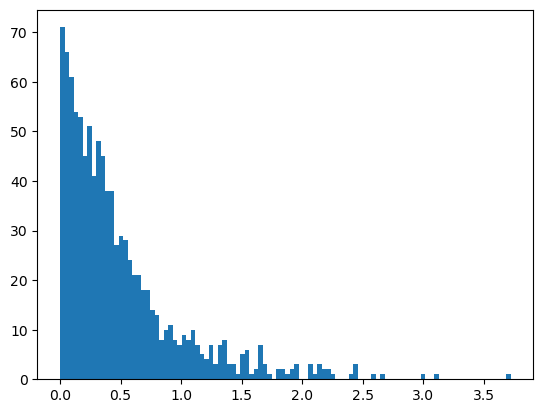

In [22]:
#More machinary is needed to get multiple numbers from expovariate
exp = []
for k in range(1, 1000):
    rando = rn.expovariate(lambd=2)
    exp.append(rando)
mp.hist(exp,bins=100)